- RNN 구조
- LSTM
- 게이트 순환 신경망 GRU
- 양방향 RNN

# 문제점
1. 불규칙 변동
 - 규칙성이 없다.
 - 우연에 의한 발생(전쟁, 홍수, 화재, 지진, 파업 등)

2. 추세 변동
 - 장기적인 변화 추세 - 단기간에는 추세 변동을 찾기 어려움(GDP, 인구증가율)

3. 순환 변동
 - 일정한 기간을 주기로 순환적으로 나타나는 변동

4. 계절 변동
 - 계절적 요인이나 사회적 관습에 따라 1년 주기로 발생하는 것을 의미

In [1]:
# 규칙적(트렌드, 분산의 변화 없음) / 불규칙

In [2]:
# 시계열데이터 : 규칙적인 패턴을 찾는 문제
# 다양한 알고리즘 존재

##### AR (AutoGegressive) 자기회귀 : 이전 관측값이 이후 관측값에 영향을 준다는 아이디어
- 모수에 과거시검을 곱합

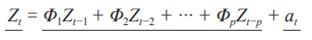

In [3]:
from IPython import display
display.Image("/content/50.jpg")

##### MA(Moving Average) 이동 평균 : 평균 또는 시계열 그래프에서 Y값이 변화하는 상황에 적합한 회귀 모델
-  윈도우 개념 - 이동평균 모델  매개변수에 과저시점의 오차를 곱함
- P시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형

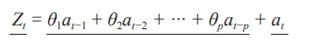

In [4]:
display.Image("/content/51.jpg")

##### ARMA는 AR MA를 합친것(AutoGregressive Moving Average)
- AR모델처럼 이전 데이터의 상태에서 현재 데이터의 상태를 추론하는것이 아닌 이전 데이터의 오차에서 현재 데이터의 상태를 추론

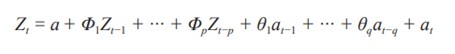

In [5]:
display.Image("/content/52.jpg")

##### ARIMA 모델(AutoRgressive Integrated Moving Average) 자기회귀 누적 이동 평균
- ARIMA(p,d,q)
- p : 자기 회귀
- d: 차분 차수
- q: 이동 평균 차수
- fit(), predict()
- statsmodels 라이브러리
  - 검정 및 추정, 회귀 분석, 시계열 분석

In [6]:
# !pip install statsmodels

##### 순환 신경망 RNN(Recurrent Neural Network)
- 기존순환 신경망 -> Momory (현재까지 입력데이터를 요약한 정보)
- 새로운 입력이 네트웍으로 들어올 때마다 기억이 조금씩 수정, 최종-> 입력전체를 요약한 정보
- 외부입력과 자기의 이전상태를 입력받아서 현재상태를 갱신

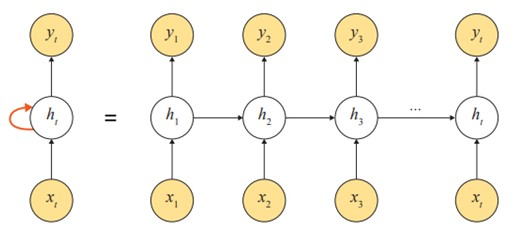

In [7]:
display.Image("/content/53.jpg")

1. 1 vs 1 : 순환이 없고 순방향 네트웍
2. 1 vs 다 : 입력이 하나 출력이 여러개 : 이미지를 입력하면 이미지에 대한 설명을 문장으로 출력하는 이미지 캡션
3. 다 vs 1 : 입력이 다수고 출력이 하나 : 문장을 입력하면 긍정/부정으로 출력하는 감성분석
- 아래 구조처럼 입력과 출력 사이에 셀이 하나만 존재

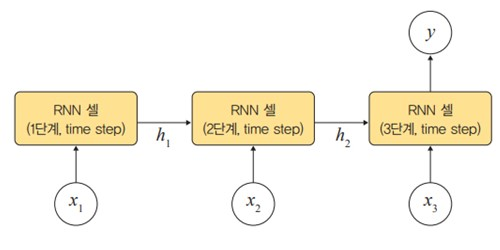

In [8]:
display.Image("/content/54.jpg")

In [9]:
# 층을 쌓아서 만든 다 vs 1 구조

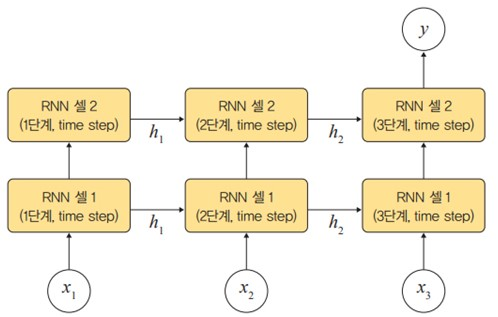

In [10]:
display.Image("/content/55.jpg")

In [11]:
# 다 vs 다 : 입력과 출력이 다수인 구조 -> 언어 번역기 : PyTorch에서는 구현이 까다로움 >> seq2seq 시퀀스 to 시퀀스

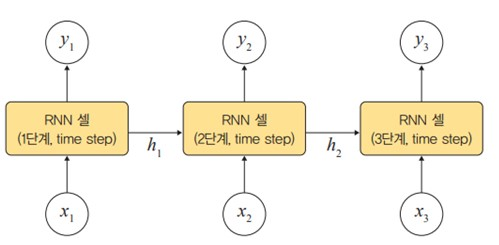

In [12]:
display.Image("/content/56.jpg")

In [13]:
# 동기화 다 vs 다 : 입력과 출력이 다수 : 문장에서 다음 문장에 나올 단어를 예측 >> 비디오 분류가 대표적

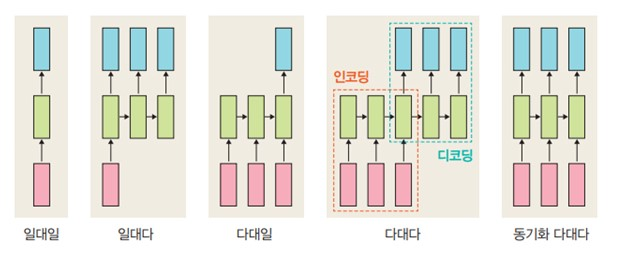

In [14]:
display.Image("/content/57.jpg")

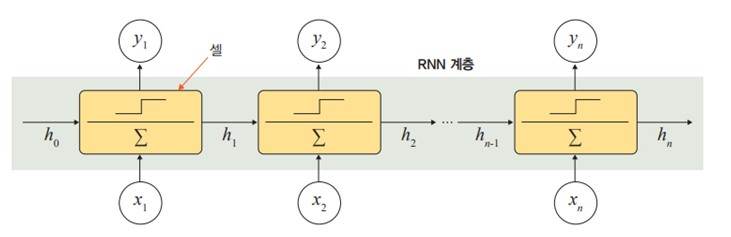

In [15]:
display.Image("/content/58.jpg")

In [16]:
# nn.RNNCell : SimpleRNN 계층에 대응되는 RNN셀
# nn.GRUCell : GRU 계층에 대응되는 셀
# nn.LSTMCell : LSTM 계층에 대응되는 셀
# 은닉층 계산은 현재 x와 이전 상태의 h가 필요함

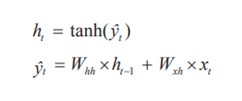

In [17]:
display.Image("/content/59.jpg")

In [18]:
# 출력층은 소프트맥스를 사용

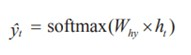

In [19]:
display.Image("/content/60.jpg")

In [20]:
# RNN에서의 오차는 forward학습과 달리 각 단계(T)마다 오차를 측정
# 각 단계마다 평균 제곱오차를 이용해서 측정

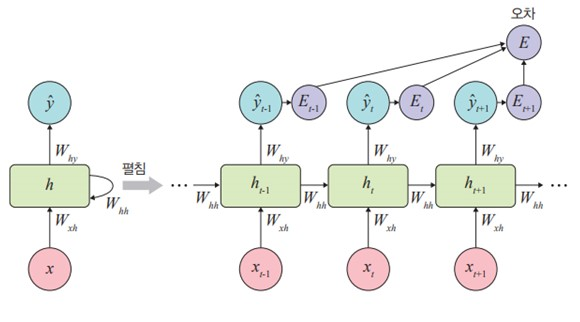

In [21]:
display.Image("/content/61.jpg")

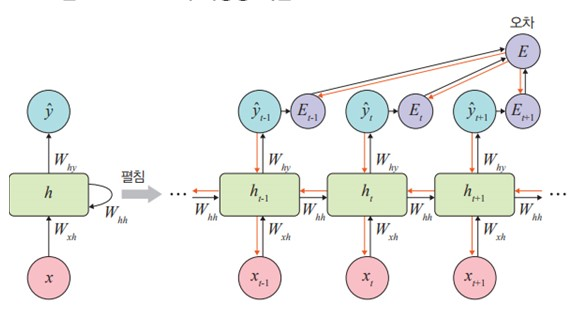

In [22]:
display.Image("/content/62.jpg")

In [23]:
# 역전파. BPTT(BackPropagation Throught Time)을 이용해서 모든 단계마닥 처음부터 끝까지 역전파
# 기울기 소멸문제가  발생.몇단계까지만 역전파 생략된 BPTT(대략 5단계)  : LSTM GRU를 사용

In [24]:
# RNN 구조 - IMDB데이터셋
# torchtext가 필요 : 자연어처리에 필요한 라이브러리 내장

In [25]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [26]:
# !pip install torchtext==0.9.0
torchtext.__version__

'0.9.0'

In [27]:
from torchtext.legacy import datasets

In [28]:
start= time.time()
TEXT = torchtext.legacy.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL = torchtext.legacy.data.Field(sequential=False) # 데이터 순서가 있는지 나타내며 기본값은 True. 여기서는 긍정부정만
# 부정1, 긍정2

In [29]:
from torchtext.legacy import datasets

In [30]:
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:05<00:00, 14.5MB/s]


In [31]:
print(vars(train_data.examples[0]))

{'text': ['"toi', 'le', 'venin"', 'is', 'robert', "hossein's", 'masterpiece,and', 'one', 'of', 'the', 'great', 'thrillers', 'of', 'the', 'fifties.based', 'on', 'a', 'frederic', 'dard', 'novel,a', 'writer', 'the', 'director', 'often', 'worked', 'with', '(see', 'also', '"le', 'monte-charge"', 'which', 'hossein', 'did', 'not', 'direct', 'but', 'in', 'which', 'he', 'was', 'the', 'lead', 'too),the', 'screenplay', 'grabs', 'you', 'from', 'the', 'first', 'pictures', 'on', 'a', 'desert', 'road', 'by', 'night', 'where', 'a', 'beautiful', 'blonde', 'might', 'be', 'the', 'fieriest', 'of', 'the', 'criminals', 'to', 'the', 'mysterious', 'house', 'where', 'he', 'finds', 'his', 'femme', 'fatale', '..and', 'her', 'sister.then', 'begins', 'a', 'cat', 'and', 'mouse', 'play', '.one', 'of', 'the', 'sisters', 'is', 'in', 'a', 'wheelchair', '.but', 'is', 'she', 'really', 'disabled?which', 'one', 'is', 'the', 'criminal', 'who', 'tried', 'to', 'kill', 'the', 'hero', 'on', 'that', 'night?', '<br', '/><br', '/>

In [ ]:
for example in train_data.examples:
  text = [x.lower() for x in vars(example)['text'] ]
  text = [x.replace(""
,"") for x in text]
  text = [ ''.join(a for a in x if a not in string.punctuation)  for x in text]
  text = [x for x in text if x]
  vars(example)['text'] = text

In [ ]:
for example in test_data.examples:
  text = [x.lower() for x in vars(example)['text'] ]
  text = [x.replace(""
,"") for x in text]
  text = [ ''.join(a for a in x if a not in string.punctuation)  for x in text]
  text = [x for x in text if x]
  vars(example)['text'] = text

In [35]:
# 훈련데이터와 검증데이터 분리

In [36]:
import random

In [37]:
train_data, valid_data = train_data.split(random_state = random.seed(0), split_ratio = 0.8)
len(train_data),len(valid_data),len(test_data)

(20000, 5000, 25000)

In [38]:
# 단어 집합 : 중복단어 제거
TEXT.build_vocab(train_data, max_size = 10000, min_freq = 10, vectors = None)
# vectors 임베딩 벡터... 사전학습된 벡터 여기서는 실제 학습을 하기때문에 사용하지 않음
LABEL.build_vocab(train_data)

In [39]:
LABEL.vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fb257f23d90>>,
            {'<unk>': 0, 'pos': 1, 'neg': 2})

In [40]:
# 전처리 완료   BucketIterator를 이용해서 데이터셋을 메모리로 가져옮

In [41]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [42]:
device

device(type='cpu')

In [43]:
embeding_dim = 100  # 각 단어를 100차원으로 조정( 임베딩 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300
train_iterator, valid_iterator,test_iterator =  torchtext.legacy.data.BucketIterator.splits(
    (train_data, valid_data,test_data),
    batch_size=BATCH_SIZE,
    device=device
)

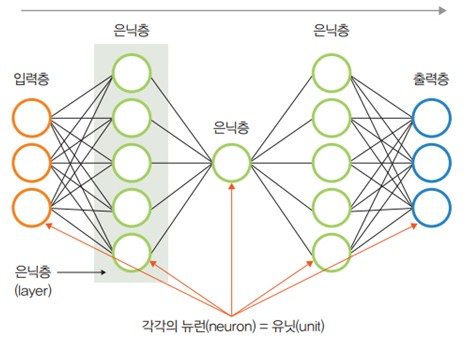

In [44]:
display.Image("/content/63.jpg")

In [45]:
# layer의 유닛개수를 늘리는 것보다 계층 자체의 계수를 늘리는 것이 성능을 위해 더 좋음
# 은닉층의 층수는 비선형 문제를 좀더 잘 학습할수 있도록 하고, 층 안에 포함된 뉴런은 가중치와 바이어스를 계산하는 용도로 사용
# 많은 층과 유닛을 구성한후에 과적합이 발생하지 않도록 개수를 조정

In [46]:
# 구현
class RNNCell_Encoder(nn.Module):
  def __init__(self,input_dim, hidden_size):
    super(RNNCell_Encoder,self).__init__()
    self.rnn = nn.RNNCell(input_dim, hidden_size)
  def forward(self,inputs):
    bz = inputs.shape[1]
    ht = torch.zeros((bz,hidden_size)).to(device)
    for word in inputs:
      ht = self.rnn(word,ht)
    return ht

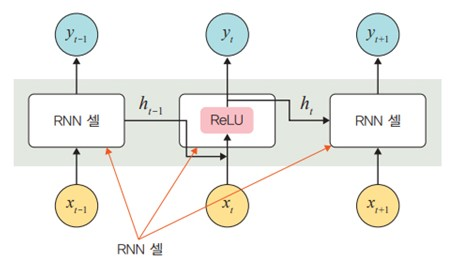

In [47]:
display.Image("/content/64.jpg")

In [48]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
    self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
    self.fc1 = nn.Linear(hidden_size, 256)
    self.fc2 = nn.Linear(256,3)
  def forward(self,x):
    x = self.em(x)
    x = self.rnn(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [49]:
# 옵티마이져와 손실함수 정의
model = Net()
model.to(device)
loss_fn = nn.CrossEntropyLoss()# 다중 분류에 사용, nn.LogSoftmax와 nn.NLLoss 조합
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [50]:
# 모델 학습을 위한 함수 정의
def training(epoch, model, trainloader, validloader):
  correct = 0
  total = 0
  running_loss = 0
  model.train()
  for b in trainloader:
    x,y=b.text, b.label
    x,y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred,y) # crossEntropyLoss 손실 함수를 이용하여 오차를 계산
    optimizer.zero_grad() # 이전 기울기를 초기화
    loss.backward()
    optimizer.step()
    with torch.no_grad():
      y_pred = torch.argmax(y_pred, dim=1)
      correct += (y_pred == y).sum().item()
      total += y.size(0)
      running_loss += loss.item()
  epoch_loss = running_loss / len(trainloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어서 에포크 단계마다 오차를 구한다
  epoch_acc = correct /  total

  valid_correct = 0
  valid_total = 0
  valid_running_loss = 0
  model.eval()
  with torch.no_grad():
    for b in validloader:
      x,y = b.text, b.label
      x,y = x.to(device), y.to(device)
      y_pred = model(x)
      loss = loss_fn(y_pred,y) # crossEntropyLoss 손실 함수를 이용하여 오차를 계산      
      y_pred = torch.argmax(y_pred, dim=1)
      valid_correct += (y_pred == y).sum().item()
      valid_total += y.size(0)
      valid_running_loss += loss.item()
  epoch_valid_loss = valid_running_loss / len(validloader.dataset) # 누적된 오차를 전체 데이터셋으로 나누어서 에포크 단계마다 오차를 구한다
  epoch_valid_acc = valid_correct /  valid_total

  print('epoch: ', epoch,
        'loss： ', round(epoch_loss, 3),
        'accuracy:', round(epoch_acc, 3),
        'valid_loss： ', round(epoch_valid_loss, 3),
        'valid_accuracy:', round(epoch_valid_acc, 3)
        )
  return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [51]:
# 오래 걸림 주의
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,model,train_iterator,valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

end = time.time()
print(end-start)

epoch:  0 loss：  0.011 accuracy: 0.5 valid_loss：  0.011 valid_accuracy: 0.505
epoch:  1 loss：  0.011 accuracy: 0.501 valid_loss：  0.011 valid_accuracy: 0.494
epoch:  2 loss：  0.011 accuracy: 0.511 valid_loss：  0.011 valid_accuracy: 0.494
epoch:  3 loss：  0.011 accuracy: 0.518 valid_loss：  0.011 valid_accuracy: 0.494
epoch:  4 loss：  0.011 accuracy: 0.52 valid_loss：  0.011 valid_accuracy: 0.512
5281.364397525787
